In [41]:
from pyrosetta.rosetta.protocols import *
from pyrosetta import * 
init()
pose = pose_from_pdb("wt.pdb")
testPose = Pose()
testPose.assign(pose)
print(testPose)

sfxn = get_fa_scorefxn()
#sfxn = pyrosetta.create_score_function('ref2015_cart')
#relax = pyrosetta.rosetta.protocols.relax.ClassicRelax()
#cycles = 2
#relax = pyrosetta.rosetta.protocols.relax.FastRelax(scorefxn, cycles)
#relax.cartesian(True)
#relax.minimize_bond_angles(True)
#relax.minimize_bond_lengths(True)
#relax.set_scorefxn(sfxn)
#relax.apply(pose)
print(sfxn)

PyRosetta-4 2021 [Rosetta PyRosetta4.Release.python36.ubuntu 2021.50+release.4ff291ed8257ec2d0cd4d96ae4289e1d39ce1007 2021-12-16T00:25:15] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python36.ubuntu r306 2021.50+release.4ff291ed825 4ff291ed8257ec2d0cd4d96ae4289e1d39ce1007 http://www.pyrosetta.org 2021-12-16T00:25:15
core.init: command: PyRosetta -ex1 -ex2aro -database /media/asus/shityakoff/miniconda3.5/envs/py/lib/python3.6/site-packages/pyrosetta-2021.50+release.4ff291ed825-py3.6-linux-x86_64.egg/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=-82770978 seed_offset=0 real_seed=-82770978
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=-82770978 RG_type=mt19937
core.import_pose.import_pose: Fi

In [42]:
from additional_scripts import predict_ddG
sfxn = get_score_function()
reference_pose = predict_ddG.mutate_residue(pose, 52, "F", 8.0, sfxn)

core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.pack.pack_rotamers: built 58 rotamers at 13 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph


In [43]:
# Score the alanine reference pose
score_wt = sfxn.score(reference_pose)
# Repack and score the L111 conformation
pose_mut = predict_ddG.mutate_residue(pose, 52, "L", 8.0, sfxn)
score_mut = sfxn.score(pose_mut)
# Compute the ddG of mutation as mutant_score - native_score (final-initial)
ddG = score_mut - score_wt
print(ddG)

core.pack.pack_rotamers: built 56 rotamers at 13 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
17.299121153587013


In [44]:
#pose.dump_pdb( "wt_fast.pdb" )

In [45]:
from additional_scripts import predict_ddG
#sfxn = get_score_function()
reference_pose1 = predict_ddG.mutate_residue(pose, 78, "E", 8.0, sfxn)

core.pack.pack_rotamers: built 37 rotamers at 10 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating DensePDInteractionGraph


In [46]:
# Score the alanine reference pose
score_wt = sfxn.score(reference_pose1)
# Repack and score the L111 conformation
pose_mut = predict_ddG.mutate_residue(pose, 78, "K", 8.0, sfxn)
score_mut = sfxn.score(pose_mut)
# Compute the ddG of mutation as mutant_score - native_score (final-initial)
ddG = score_mut - score_wt
print(ddG)

core.pack.pack_rotamers: built 41 rotamers at 10 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
2.739246657647776


In [47]:
mutant_res1 = predict_ddG.mutate_residue(pose, 52, "L", 8.0, sfxn)
mutant_res2 = predict_ddG.mutate_residue(pose, 78, "K", 8.0, sfxn)
print(mutant_res1)
print(mutant_res2)

core.pack.pack_rotamers: built 56 rotamers at 13 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
core.pack.pack_rotamers: built 41 rotamers at 10 positions.
core.pack.interaction_graph.interaction_graph_factory: Instantiating PDInteractionGraph
PDB file name: wt.pdb
Total residues: 179
Sequence: REKEQFRKLFIGGLSFETTEESLRNYYEQWGKLTDCVVMRDPASKRSRGFGLVTFSSMAEVDAAMAARPHSIDGRVVEPKRAVAREESGKPGAHVTVKKLFVGGIKEDTEEHHLRDYFEEYGKIDTIEIITDRQSGKKRGFGFVTFDDHDPVDKIVLQKYHTINGHNAEVRKALSRQEM
Fold tree:
FOLD_TREE  EDGE 1 179 -1 
PDB file name: wt.pdb
Total residues: 179
Sequence: REKEQFRKLFIGGLSFETTEESLRNYYEQWGKLTDCVVMRDPASKRSRGFGFVTFSSMAEVDAAMAARPHSIDGRVVKPKRAVAREESGKPGAHVTVKKLFVGGIKEDTEEHHLRDYFEEYGKIDTIEIITDRQSGKKRGFGFVTFDDHDPVDKIVLQKYHTINGHNAEVRKALSRQEM
Fold tree:
FOLD_TREE  EDGE 1 179 -1 


In [48]:
def get_energy_components( native_pose, mutated_pose, sfxn): 

    # Extract & parse scores
    tmp_native = native_pose.energies().total_energies().weighted_string_of( sfxn.weights() )
    tmp_mutant = mutated_pose.energies().total_energies().weighted_string_of( sfxn.weights() )
    array_native = list(filter( None, tmp_native.split(' ') ))
    array_mutant = list(filter( None, tmp_mutant.split(' ') ))

    # Pull out only the scores from these arrays
    native_scores = []
    for i in range( len(array_native) ): 
        if ( i % 2 != 0 ): 
            native_scores.append( float( array_native[i] ) )

    mutant_scores = []
    for i in range( len(array_mutant) ): 
        if ( i % 2 != 0 ): 
            mutant_scores.append( float( array_mutant[i] ) )

    # Calculate ddG of individual components
    ddGs = []
    for i in range( len( mutant_scores ) ): 
        ddG_component = mutant_scores[i] - native_scores[i]
        ddGs.append( round( ddG_component, 2 ) )

    # Get labels
    labels = []
    for i in range( len(array_native) ): 
        if ( i % 2 == 0 ): 
            labels.append( array_native[i].translate(':').strip(":") )

    return labels, ddGs

# Compute the ddG breakdown
labels, res1_ddGs = get_energy_components( reference_pose, mutant_res1, sfxn )
labels, res2_ddGs = get_energy_components( reference_pose1, mutant_res2, sfxn )
print(labels)
print(res1_ddGs)
print(res2_ddGs)
total =sum(res1_ddGs)
total1 =sum(res2_ddGs)
print(total)
print(total1)

['fa_atr', 'fa_rep', 'fa_sol', 'fa_intra_rep', 'fa_intra_sol_xover4', 'lk_ball_wtd', 'fa_elec', 'pro_close', 'hbond_sr_bb', 'hbond_lr_bb', 'hbond_bb_sc', 'hbond_sc', 'dslf_fa13', 'omega', 'fa_dun', 'p_aa_pp', 'yhh_planarity', 'ref', 'rama_prepro']
[2.87, 11.33, 1.41, -0.0, -0.08, 0.23, -0.09, 0.0, 0.0, 0.0, 0.0, -0.01, 0.0, 0.0, -0.03, 0.67, 0.0, 0.44, 0.56]
[0.62, -0.44, -1.94, 0.01, -0.12, 0.16, 2.59, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.58, -0.01, 0.0, 2.01, 0.42]
17.3
2.7199999999999993


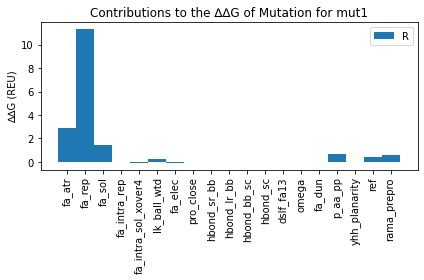

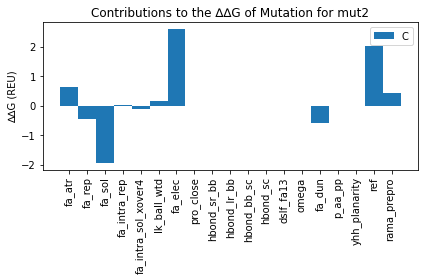

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(len(labels))  
width = 1  # the width of the bars

# Plot for lysine
fig, ax = plt.subplots()
rects2 = ax.bar(x, res1_ddGs, width, label='R')
ax.set_ylabel('∆∆G (REU)')
ax.set_title('Contributions to the ∆∆G of Mutation for mut1')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()
fig.tight_layout()

# Plot for lysine
fig, ax = plt.subplots()
rects3 = ax.bar(x, res2_ddGs, width, label='C' )
ax.set_ylabel('∆∆G (REU)')
ax.set_title('Contributions to the ∆∆G of Mutation for mut2')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()
fig.tight_layout()